In [ ]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy import stats

In [ ]:
# importing the .csv file

from google.colab import files
uploaded = files.upload()

Saving casedetails.csv to casedetails.csv


In [ ]:
# reading the .csv file

df = pd.read_csv('casedetails.csv')

In [ ]:
# brief information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5902 entries, 0 to 5901
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   source            5902 non-null   object 
 1   case_id           5902 non-null   int64  
 2   case_name         1000 non-null   object 
 3   age               5438 non-null   float64
 4   sex               5825 non-null   object 
 5   nationality       4605 non-null   object 
 6   current_status    5902 non-null   object 
 7   symptomatic_date  240 non-null    object 
 8   confirmed_date    4602 non-null   object 
 9   recovered_date    1573 non-null   object 
 10  place_id          5902 non-null   int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 507.3+ KB


In [ ]:
# first 5 records

df.head()

,source,case_id,case_name,age,sex,nationality,current_status,symptomatic_date,confirmed_date,recovered_date,place_id
0,https://coronavirus-ph-api.now.sh/cases,1,NaN,38.0,F,Chinese,Recovered,NaN,2020-01-30 00:00:00,NaN,48
1,https://coronavirus-ph-api.now.sh/cases,2,NaN,44.0,M,Chinese,Died,NaN,2020-02-02 00:00:00,NaN,48
2,https://coronavirus-ph-api.now.sh/cases,3,NaN,60.0,F,Chinese,Recovered,NaN,2020-02-05 00:00:00,NaN,48
3,https://coronavirus-ph-api.now.sh/cases,4,NaN,48.0,M,Filipino,Recovered,NaN,2020-03-05 00:00:00,NaN,48
4,https://coronavirus-ph-api.now.sh/cases,5,NaN,62.0,M,Filipino,Died,NaN,2020-03-05 00:00:00,NaN,48


In [ ]:
# last 5 records

df.tail()

,source,case_id,case_name,age,sex,nationality,current_status,symptomatic_date,confirmed_date,recovered_date,place_id
5897,https://www.wuhanvirus.sg/cases/search,996,21 Year Old Female Singaporean,21.0,F,Singaporean,In hospital,NaN,2020-04-01 00:00:00,NaN,29
5898,https://www.wuhanvirus.sg/cases/search,997,50 Year Old Male Indian,50.0,M,Indian,In hospital,NaN,2020-04-01 00:00:00,NaN,29
5899,https://www.wuhanvirus.sg/cases/search,998,31 Year Old Female British,31.0,F,British,In hospital,NaN,2020-04-01 00:00:00,NaN,29
5900,https://www.wuhanvirus.sg/cases/search,999,21 Year Old Male Singaporean,21.0,M,Singaporean,In hospital,NaN,2020-04-01 00:00:00,NaN,29
5901,https://www.wuhanvirus.sg/cases/search,1000,54 Year Old Male Singaporean,54.0,M,Singaporean,In hospital,NaN,2020-04-01 00:00:00,NaN,29


In [ ]:
# number of duplicated records

df.duplicated().sum()

0

In [ ]:
# number of null records

nullrecords = df.isnull().sum()
nullrecords

,0
source,0
case_id,0
case_name,4902
age,464
sex,77
nationality,1297
current_status,0
symptomatic_date,5662
confirmed_date,1300
recovered_date,4329


In [ ]:
# dropping confirmed_date, recovered_date, symptomatic_date and case_name columns since they are mostly empty and even if not,
# they have rubbish values which serve no significance for further processes

df.drop(['symptomatic_date', 'recovered_date', 'confirmed_date', 'case_name', 'source', 'case_id', 'place_id'], axis = 1, inplace = True)

In [ ]:
df.isnull().sum()

,0
age,464
sex,77
nationality,1297
current_status,0


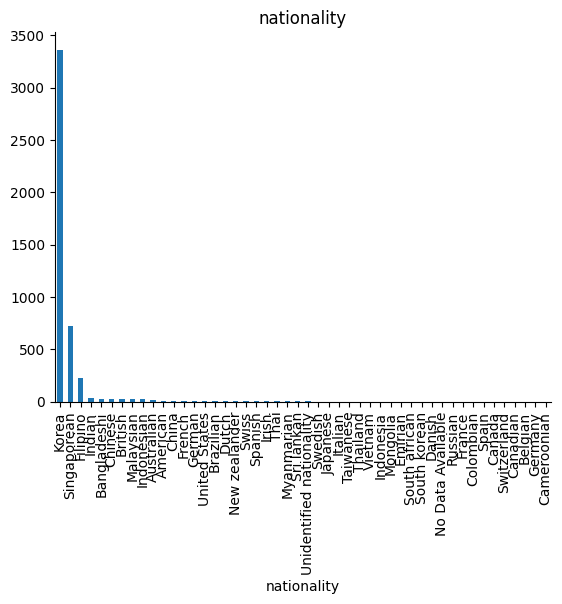

In [ ]:
# graphical eda on 'nationality'

df['nationality'].value_counts().plot(kind='bar', title='nationality')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

In [ ]:
# fill in the missing values with 'Korean' as it has most number if records

df['nationality'].fillna('Korean', inplace = True)

<ipython-input-12-9a05edf17c0e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['nationality'].fillna('Korean', inplace = True)


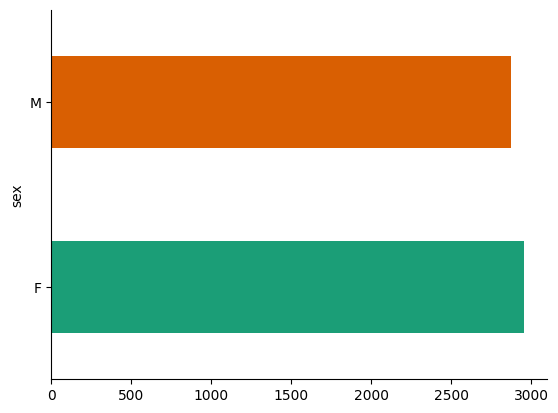

In [ ]:
# graphical eda for 'sex'

df.groupby('sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# filling in missing values with 'F'

df['sex'].fillna('F', inplace = True)

<ipython-input-14-234ab0af15e4>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sex'].fillna('F', inplace = True)


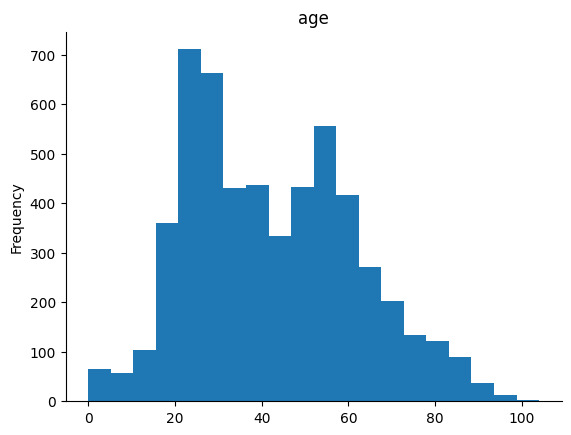

In [ ]:
# graphical eda for 'age'

df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

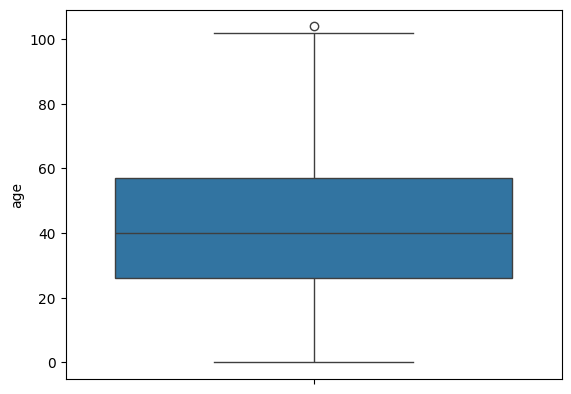

In [ ]:
# outlier analysis using a box plot

sns.boxplot(df['age'])
plt.show()

In [ ]:
# imputing missing values in the 'age' column with its mode
# since the dataset is skewed towards younger ages

mode_value = df['age'].mode()[0]
df['age'].fillna(mode_value, inplace=True)

In [ ]:
# outlier analysis

z = np.abs(stats.zscore(df['age']))
outliers = df[(z > 2.8)]

print(outliers)

        age sex  nationality current_status
1677   98.0   F        Korea       isolated
2748  104.0   F        Korea       isolated
3085   97.0   F        Korea       isolated
3089   97.0   F        Korea       isolated
3674   96.0   F       Korean      Recovered
5884  102.0   F  Singaporean    In hospital


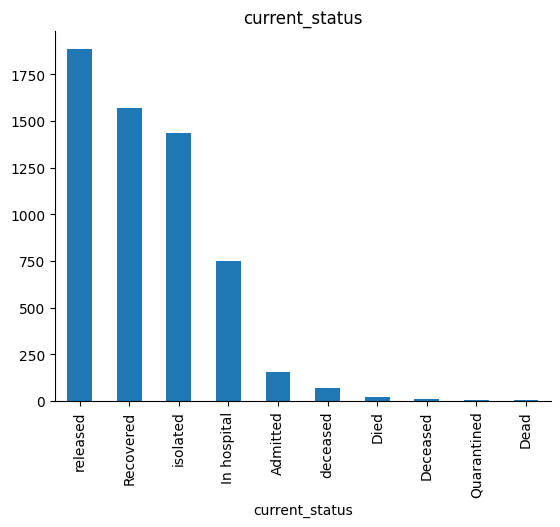

In [ ]:
# graphical eda for 'current_status'

df['current_status'].value_counts().plot(kind='bar', title='current_status')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

In [ ]:
# analyzing the 'current_status' column

print(df['current_status'].unique())

['Recovered' 'Died' 'Admitted' 'Quarantined' 'Dead' 'released' 'isolated'
 'deceased' 'Deceased' 'In hospital']


In [ ]:
status_mapping = {
    'Recovered': 'Alive',
    'released': 'Alive',
    'Died' : 'Deceased',
    'Dead': 'Deceased',
    'deceased': 'Deceased',
    'Deceased': 'Deceased',
    'Admitted': 'Alive',
    'isolated': 'Alive',
    'Quarantined': 'Alive',
    'In hospital': 'Alive'
}

In [ ]:
# merging multiple columns because of data value conflicts

df['current_status'] = df['current_status'].replace(status_mapping)

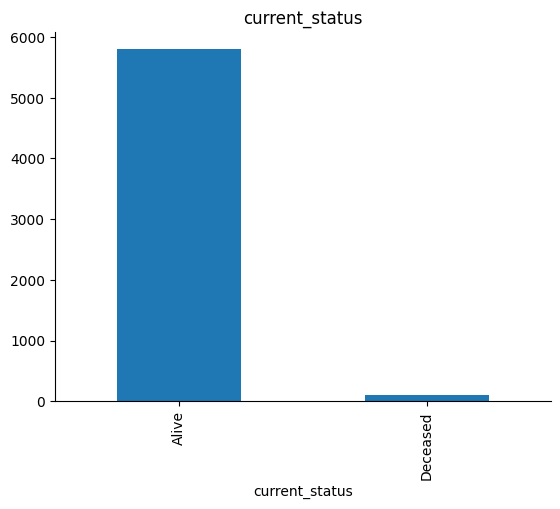

In [ ]:
# graphical eda for 'current_status' after processing

df['current_status'].value_counts().plot(kind='bar', title='current_status')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

In [ ]:
# analyzing the preprocessed dataset

df.head()

,age,sex,nationality,current_status
0,38.0,F,Chinese,Alive
1,44.0,M,Chinese,Deceased
2,60.0,F,Chinese,Alive
3,48.0,M,Filipino,Alive
4,62.0,M,Filipino,Deceased


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
nationality,0
current_status,0


In [ ]:
# label encoding 'sex', 'nationality' and 'current_status' columns

label_encoders = {}

for column in ["sex", "nationality", "current_status"]:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [ ]:
scaler = StandardScaler()

df['age'] = scaler.fit_transform(df[['age']])

In [ ]:
df.head()

,age,sex,nationality,current_status
0,-0.140413,0,10,0
1,0.167584,1,10,1
2,0.988908,0,10,0
3,0.372915,1,15,0
4,1.091574,1,15,1


In [ ]:
df.to_csv('processed_casedetails.csv')

In [ ]:
files.download('processed_casedetails.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>